# 資料探索性分析（EDA）- 中國東南部資料集

**資料集**: SUA_CVDs_risk_factors.csv (2010-2018)

**樣本數**: 25,744 筆

**目標**: 了解資料基本特性，為後續模型訓練做準備

**日期**: 2025-11-11

## 1. 載入套件

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 設定中文字型（Windows 環境）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Microsoft YaHei', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 設定視覺化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# 顯示所有欄位
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("套件載入成功！")
print(f"使用字型: {plt.rcParams['font.sans-serif'][0]}")

套件載入成功！
使用字型: Arial


In [16]:
# 檢查系統可用的中文字型
import matplotlib.font_manager as fm

print("正在檢查可用的中文字型...")
chinese_fonts = []
for font in fm.fontManager.ttflist:
    if any(keyword in font.name for keyword in ['Microsoft', 'JhengHei', 'YaHei', 'SimHei', '微軟', '黑體', 'Ming', 'Kai']):
        chinese_fonts.append(font.name)

chinese_fonts = sorted(set(chinese_fonts))
if chinese_fonts:
    print(f"\n找到 {len(chinese_fonts)} 個中文字型:")
    for font in chinese_fonts[:10]:  # 只顯示前 10 個
        print(f"  - {font}")
else:
    print("\n⚠️ 未找到常見的中文字型")
    print("建議使用以下方法之一：")
    print("1. 不顯示中文標題（使用英文）")
    print("2. 安裝中文字型到 matplotlib")
    
# 如果有中文字型，更新設定
if chinese_fonts:
    plt.rcParams['font.sans-serif'] = [chinese_fonts[0]] + plt.rcParams['font.sans-serif']
    print(f"\n✅ 已設定字型為: {plt.rcParams['font.sans-serif'][0]}")
else:
    print("\n⚠️ 將使用英文標題以避免顯示問題")

正在檢查可用的中文字型...

找到 14 個中文字型:
  - DFKai-SB
  - KaiTi
  - Microsoft Himalaya
  - Microsoft JhengHei
  - Microsoft New Tai Lue
  - Microsoft PhagsPa
  - Microsoft Sans Serif
  - Microsoft Tai Le
  - Microsoft Uighur
  - Microsoft YaHei

✅ 已設定字型為: DFKai-SB


## 2. 載入資料

In [3]:
# 資料路徑
data_path = Path('../../data/raw/SUA_CVDs_risk_factors.csv')

# 載入資料
df = pd.read_csv(data_path)

print(f"✅ 資料載入成功！")
print(f"資料形狀: {df.shape[0]} 筆資料, {df.shape[1]} 個欄位")

✅ 資料載入成功！
資料形狀: 25744 筆資料, 15 個欄位


## 3. 資料基本資訊

In [4]:
# 查看前5筆資料
print("=" * 80)
print("前5筆資料:")
print("=" * 80)
df.head()

前5筆資料:


,ID,sex,Age,BMI,SBP,DBP,FBG,TC,Cr,GFR,UA,Times,hypertension,hyperglycemia,dyslipidemia
0,1,2,79,24.35,132,83,6.20,4.65,54,116.182,284,1,1,1,1
1,1,2,81,25.24,136,85,6.09,4.97,95,57.605,208,2,1,1,1
2,1,2,83,23.43,120,86,6.16,4.92,66,89.899,230,3,1,1,1
3,1,2,85,24.70,144,80,6.24,5.15,50,126.093,199,4,2,1,1
4,2,2,63,27.27,120,73,5.37,4.08,63,100.027,247,1,1,1,1


In [5]:
# 欄位資訊
print("=" * 80)
print("欄位資訊:")
print("=" * 80)
df.info()

欄位資訊:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25744 entries, 0 to 25743
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             25744 non-null  int64  
 1   sex            25744 non-null  int64  
 2   Age            25744 non-null  int64  
 3   BMI            25744 non-null  float64
 4   SBP            25744 non-null  int64  
 5   DBP            25744 non-null  int64  
 6   FBG            25744 non-null  float64
 7   TC             25744 non-null  float64
 8   Cr             25744 non-null  int64  
 9   GFR            25744 non-null  float64
 10  UA             25744 non-null  int64  
 11  Times          25744 non-null  int64  
 12  hypertension   25744 non-null  int64  
 13  hyperglycemia  25744 non-null  int64  
 14  dyslipidemia   25744 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.9 MB


In [6]:
# 欄位名稱列表
print("=" * 80)
print("所有欄位名稱:")
print("=" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

所有欄位名稱:
 1. ID
 2. sex
 3. Age
 4. BMI
 5. SBP
 6. DBP
 7. FBG
 8. TC
 9. Cr
10. GFR
11. UA
12. Times
13. hypertension
14. hyperglycemia
15. dyslipidemia


## 4. 血液檢驗指標確認

根據資料集實際欄位，包含以下血液檢驗指標：

**血液檢驗指標（6項）**：
1. **FBG** - 空腹血糖 (Fasting Blood Glucose) - mmol/L
2. **TC** - 總膽固醇 (Total Cholesterol) - mmol/L
3. **Cr** - 肌酐酸 (Creatinine) - μmol/L
4. **UA** - 尿酸 (Uric Acid) - μmol/L
5. **GFR** - 腎絲球過濾率 (Glomerular Filtration Rate) - mL/min/1.73m²

**身體測量指標（3項）**：
6. **BMI** - 身體質量指數 (Body Mass Index) - kg/m²
7. **SBP** - 收縮壓 (Systolic Blood Pressure) - mmHg
8. **DBP** - 舒張壓 (Diastolic Blood Pressure) - mmHg

**基本資訊**：
- **ID** - 參與者編號
- **sex** - 性別 (1=男, 2=女)
- **Age** - 年齡
- **Times** - 檢查次數 (1, 2, 3, ...)

**目標變數（3項）**：
- **hypertension** - 高血壓 (1=否, 2=是)
- **hyperglycemia** - 高血糖 (1=否, 2=是)
- **dyslipidemia** - 高血脂 (1=否, 2=是)

In [7]:
# 定義血液檢驗相關欄位（根據實際資料集）
blood_test_cols = ['FBG', 'TC', 'Cr', 'UA', 'GFR']
body_measure_cols = ['BMI', 'SBP', 'DBP']
basic_info_cols = ['ID', 'sex', 'Age', 'Times']
target_cols = ['hypertension', 'hyperglycemia', 'dyslipidemia']

print("=" * 80)
print("資料集欄位分類:")
print("=" * 80)
print(f"\n📊 血液檢驗指標 ({len(blood_test_cols)} 項):")
for i, col in enumerate(blood_test_cols, 1):
    print(f"  {i}. {col}")

print(f"\n📏 身體測量指標 ({len(body_measure_cols)} 項):")
for i, col in enumerate(body_measure_cols, 1):
    print(f"  {i}. {col}")

print(f"\n👤 基本資訊 ({len(basic_info_cols)} 項):")
for i, col in enumerate(basic_info_cols, 1):
    print(f"  {i}. {col}")

print(f"\n🎯 目標變數 ({len(target_cols)} 項):")
for i, col in enumerate(target_cols, 1):
    print(f"  {i}. {col}")

# 計算可用於預測的特徵數（不含 ID 和 Times）
feature_cols = blood_test_cols + body_measure_cols + ['sex', 'Age']
print(f"\n✅ 可用於預測的特徵數: {len(feature_cols)} 項")
print(f"   - 血液檢驗: {len(blood_test_cols)} 項")
print(f"   - 身體測量: {len(body_measure_cols)} 項")
print(f"   - 人口統計: 2 項 (sex, Age)")
print("=" * 80)

資料集欄位分類:

📊 血液檢驗指標 (5 項):
  1. FBG
  2. TC
  3. Cr
  4. UA
  5. GFR

📏 身體測量指標 (3 項):
  1. BMI
  2. SBP
  3. DBP

👤 基本資訊 (4 項):
  1. ID
  2. sex
  3. Age
  4. Times

🎯 目標變數 (3 項):
  1. hypertension
  2. hyperglycemia
  3. dyslipidemia

✅ 可用於預測的特徵數: 10 項
   - 血液檢驗: 5 項
   - 身體測量: 3 項
   - 人口統計: 2 項 (sex, Age)


## 5. 缺失值分析

In [8]:
# 計算缺失值
missing_stats = pd.DataFrame({
    '缺失數量': df.isnull().sum(),
    '缺失比例(%)': (df.isnull().sum() / len(df) * 100).round(2)
})

# 只顯示有缺失值的欄位
missing_stats = missing_stats[missing_stats['缺失數量'] > 0].sort_values('缺失數量', ascending=False)

print("=" * 80)
print("缺失值統計:")
print("=" * 80)
print(missing_stats)

# 視覺化缺失值
if len(missing_stats) > 0:
    plt.figure(figsize=(12, 6))
    missing_stats['缺失比例(%)'].plot(kind='barh', color='coral')
    plt.xlabel('缺失比例 (%)')
    plt.title('缺失值比例分析')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ 沒有缺失值！")

缺失值統計:
Empty DataFrame
Columns: [缺失數量, 缺失比例(%)]
Index: []

✅ 沒有缺失值！


## 6. 基本統計摘要

In [9]:
# 數值型欄位的統計摘要
print("=" * 80)
print("數值型欄位統計摘要:")
print("=" * 80)
df.describe().T

數值型欄位統計摘要:


,count,mean,std,min,25%,50%,75%,max
ID,25744.0,3074.331650,1776.734113,1.000,1539.000,3063.000,4624.250,6119.000
sex,25744.0,1.669360,0.470453,1.000,1.000,2.000,2.000,2.000
Age,25744.0,69.381021,9.680964,40.000,63.000,69.000,75.000,106.000
BMI,25744.0,23.331660,3.133102,11.810,21.190,23.140,25.280,41.630
SBP,25744.0,125.642014,13.065070,78.000,117.000,126.000,134.000,208.000
DBP,25744.0,75.169282,8.712026,36.000,70.000,76.000,80.000,116.000
FBG,25744.0,5.498193,0.826459,2.210,5.000,5.360,5.800,16.370
TC,25744.0,4.873961,0.880537,1.730,4.270,4.860,5.460,10.250
Cr,25744.0,72.647258,14.729961,31.000,65.000,67.000,90.000,235.000
GFR,25744.0,105.082823,29.224731,18.451,84.628,103.238,122.781,288.128


## 7. 目標變數分析

分析三高的分佈：
- 高血壓
- 高血糖
- 高血脂

In [10]:
# 分析三高目標變數的分佈
print("=" * 80)
print("三高目標變數分析")
print("=" * 80)

# 先確認 target_cols 內容
print(f"\n🔍 Target columns: {target_cols}")
print(f"🔍 Number of targets: {len(target_cols)}\n")

for i, col in enumerate(target_cols, 1):
    print(f"\n{i}. {col}:")
    print(f"   類別分佈:")
    value_counts = df[col].value_counts().sort_index()
    for value, count in value_counts.items():
        label = "否 (正常)" if value == 1 else "是 (有病)"
        percentage = count / len(df) * 100
        print(f"      {value} ({label}): {count:,} 筆 ({percentage:.2f}%)")
    
print("\n" + "=" * 80)

三高目標變數分析

🔍 Target columns: ['hypertension', 'hyperglycemia', 'dyslipidemia']
🔍 Number of targets: 3


1. hypertension:
   類別分佈:
      1 (否 (正常)): 21,974 筆 (85.36%)
      2 (是 (有病)): 3,770 筆 (14.64%)

2. hyperglycemia:
   類別分佈:
      1 (否 (正常)): 24,670 筆 (95.83%)
      2 (是 (有病)): 1,074 筆 (4.17%)

3. dyslipidemia:
   類別分佈:
      1 (否 (正常)): 24,172 筆 (93.89%)
      2 (是 (有病)): 1,572 筆 (6.11%)



## 8. 血液檢驗指標分佈視覺化

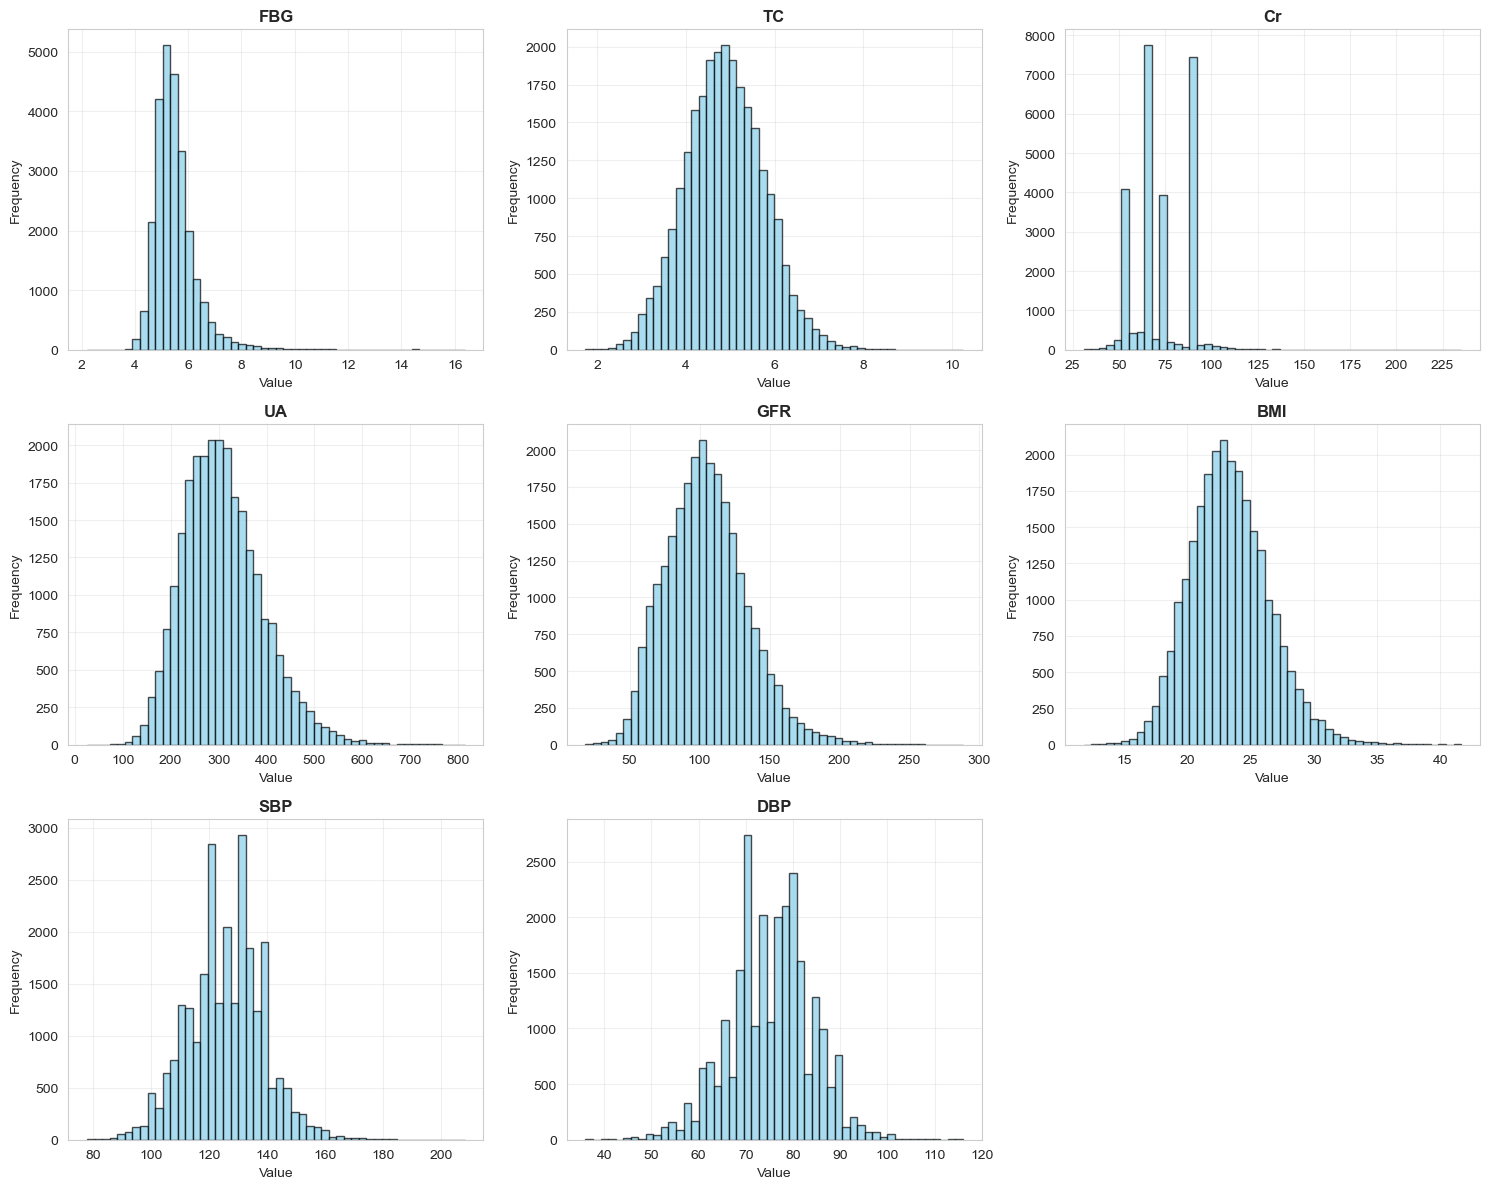

✅ 圖表已儲存至: docs/experiments/blood_test_distributions.png


In [11]:
# 繪製血液檢驗指標和身體測量的分佈圖
all_features = blood_test_cols + body_measure_cols
n_features = len(all_features)

# 計算子圖佈局
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(all_features):
    df[col].hist(bins=50, ax=axes[i], color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# 隱藏多餘的子圖
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('../../docs/experiments/blood_test_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ 圖表已儲存至: docs/experiments/blood_test_distributions.png")

## 9. 相關性分析

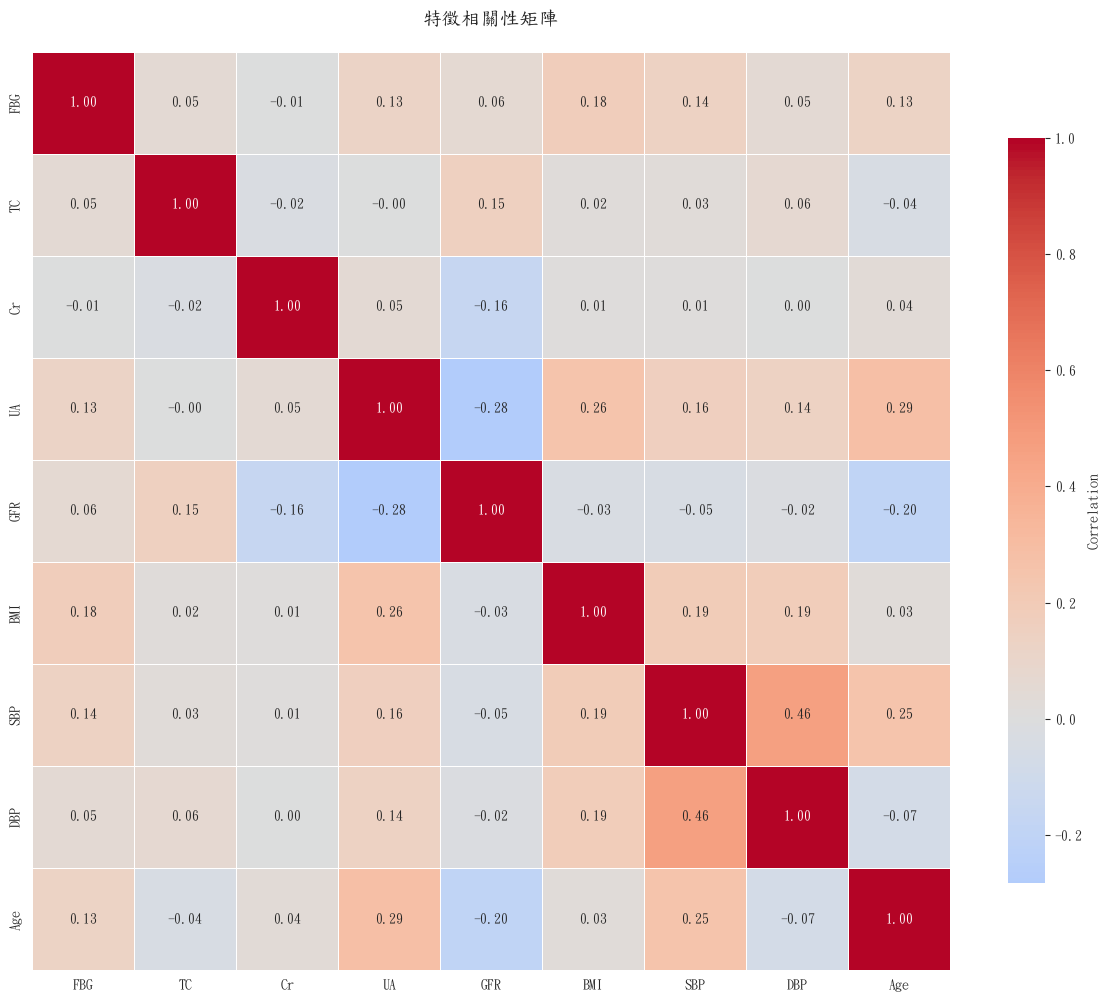

✅ 圖表已儲存至: docs/experiments/correlation_matrix.png


In [17]:
# 計算血液檢驗指標和身體測量的相關性
all_numeric_features = blood_test_cols + body_measure_cols + ['Age']

plt.figure(figsize=(12, 10))
correlation = df[all_numeric_features].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8, "label": "Correlation"})
plt.title('特徵相關性矩陣', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../../docs/experiments/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ 圖表已儲存至: docs/experiments/correlation_matrix.png")

## 10. 資料品質總結

In [13]:
print("=" * 80)
print("資料品質總結報告")
print("=" * 80)
print(f"\n1. 基本資訊:")
print(f"   - 總筆數: {df.shape[0]:,}")
print(f"   - 總欄位數: {df.shape[1]}")
print(f"   - 記憶體使用: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. 特徵統計:")
print(f"   - 血液檢驗指標: {len(blood_test_cols)} 項")
print(f"   - 身體測量指標: {len(body_measure_cols)} 項")
print(f"   - 基本資訊: {len(basic_info_cols)} 項")
print(f"   - 目標變數: {len(target_cols)} 項")

print(f"\n3. 資料完整度:")
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
completeness = (1 - total_missing / total_cells) * 100
print(f"   - 缺失值總數: {total_missing:,}")
print(f"   - 資料完整度: {completeness:.2f}%")

print(f"\n4. 縱向資料結構:")
unique_ids = df['ID'].nunique()
total_records = len(df)
avg_records_per_person = total_records / unique_ids
print(f"   - 參與人數: {unique_ids:,}")
print(f"   - 總記錄數: {total_records:,}")
print(f"   - 平均每人記錄數: {avg_records_per_person:.2f}")

print(f"\n5. Times 分佈:")
times_dist = df['Times'].value_counts().sort_index()
for time, count in times_dist.head(5).items():
    print(f"   - 第 {time} 次檢查: {count:,} 筆 ({count/total_records*100:.2f}%)")

print(f"\n6. 三高盛行率:")
for col in target_cols:
    disease_rate = (df[col] == 2).sum() / len(df) * 100
    print(f"   - {col}: {disease_rate:.2f}% (有病)")

print(f"\n7. 下一步建議:")
if total_missing > 0:
    print(f"   - ⚠️ 需要處理缺失值")
else:
    print(f"   - ✅ 無缺失值，資料品質良好")

print(f"   - ✅ 資料集包含 {len(blood_test_cols)} 項血液檢驗指標")
print(f"   - ✅ 縱向資料結構完整，可進行時序預測")
print(f"   - 📌 下一步：資料重組 (T1, T2, T3) 與特徵工程 (Δ 變化量)")

print("\n" + "=" * 80)

資料品質總結報告

1. 基本資訊:
   - 總筆數: 25,744
   - 總欄位數: 15
   - 記憶體使用: 2.95 MB

2. 特徵統計:
   - 血液檢驗指標: 5 項
   - 身體測量指標: 3 項
   - 基本資訊: 4 項
   - 目標變數: 3 項

3. 資料完整度:
   - 缺失值總數: 0
   - 資料完整度: 100.00%

4. 縱向資料結構:
   - 參與人數: 6,119
   - 總記錄數: 25,744
   - 平均每人記錄數: 4.21

5. Times 分佈:
   - 第 1 次檢查: 6,119 筆 (23.77%)
   - 第 2 次檢查: 6,111 筆 (23.74%)
   - 第 3 次檢查: 6,056 筆 (23.52%)
   - 第 4 次檢查: 4,302 筆 (16.71%)
   - 第 5 次檢查: 2,526 筆 (9.81%)

6. 三高盛行率:
   - hypertension: 14.64% (有病)
   - hyperglycemia: 4.17% (有病)
   - dyslipidemia: 6.11% (有病)

7. 下一步建議:
   - ✅ 無缺失值，資料品質良好
   - ✅ 資料集包含 5 項血液檢驗指標
   - ✅ 縱向資料結構完整，可進行時序預測
   - 📌 下一步：資料重組 (T1, T2, T3) 與特徵工程 (Δ 變化量)



## 11. 儲存分析結果

In [14]:
# 儲存血液檢驗欄位清單
import json
from pathlib import Path

# 建立輸出目錄
output_dir = Path('../../docs/experiments')
output_dir.mkdir(parents=True, exist_ok=True)

# 儲存欄位清單
analysis_result = {
    'dataset_name': 'SUA_CVDs_risk_factors',
    'total_samples': int(df.shape[0]),
    'total_features': int(df.shape[1]),
    'blood_test_columns': blood_test_cols,
    'target_columns': target_cols,
    'completeness_pct': float(completeness),
    'analysis_date': '2025-11-11'
}

with open(output_dir / 'eda_summary.json', 'w', encoding='utf-8') as f:
    json.dump(analysis_result, f, indent=2, ensure_ascii=False)

print("✅ 分析結果已儲存至: docs/experiments/eda_summary.json")
print("\n完成！可以開始下一步：資料前處理與特徵工程")

✅ 分析結果已儲存至: docs/experiments/eda_summary.json

完成！可以開始下一步：資料前處理與特徵工程
